## Import Library

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')
from jcopml.plot import plot_missing_value

## Import dataset

In [2]:
df = pd.read_csv("data/google_review_ratings.csv")
df.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


#### Lakukan rename pada tiap kolom agar lebih mudah dimengerti

In [3]:
columns_names = ['User', 'churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums', 'malls', 'zoo', 'restaurants', 'pubs_bars', 'local_services', 'burger_pizza_shops', 'hotels_other_lodgings', 'juice_bars', 'art_galleries', 'dance_clubs', 'swimming_pools', 'gyms', 'bakeries', 'beauty_spas', 'cafes', 'view_points', 'monuments', 'gardens','Unnamed: 25']
df.columns = columns_names

In [4]:
df.head()

,User,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,...,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


# Data Cleaning and EDA

In [5]:
df.shape

(5456, 26)

#### Dataset kita memiliki 5456 row/baris dan 26 features/columns  

In [6]:
# check type data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
User                     5456 non-null object
churches                 5456 non-null float64
resorts                  5456 non-null float64
beaches                  5456 non-null float64
parks                    5456 non-null float64
theatres                 5456 non-null float64
museums                  5456 non-null float64
malls                    5456 non-null float64
zoo                      5456 non-null float64
restaurants              5456 non-null float64
pubs_bars                5456 non-null float64
local_services           5456 non-null object
burger_pizza_shops       5455 non-null float64
hotels_other_lodgings    5456 non-null float64
juice_bars               5456 non-null float64
art_galleries            5456 non-null float64
dance_clubs              5456 non-null float64
swimming_pools           5456 non-null float64
gyms                     5456 non-null float64
ba

- Terdapat 24 Features bertipe data numeric dan 2 categoric. hanya kolom User dan local_services yang bertipe data categoric.

In [7]:
df['local_services'].value_counts()

5        1046
1.56       80
1.58       75
1.76       67
1.75       66
         ... 
0.78        1
3.84        1
3.54        1
2\t2.       1
3.18        1
Name: local_services, Length: 296, dtype: int64

In [8]:
# untuk ngecek kolom services apakah terdapat non numeric pada kolom tersebut
df[~df['local_services'].str.match('^\-?(\d*\.?\d+|\d+\.?\d*)$')]

,User,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,...,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,Unnamed: 25
2712,User 2713,1.71,1.68,1.46,1.13,1.12,1.15,1.26,1.17,1.59,...,1.08,1.1,1.04,5.0,4.43,5.0,5.0,5.0,2.57,2.58


In [9]:
# terdapat satu data non-numeric karena satu kita dapat replace saja
df['local_services'][df['local_services'].index == 2712]

2712    2\t2.
Name: local_services, dtype: object

In [10]:
# replace data non numeric dengan angka 2
df['local_services'] = df['local_services'].replace('2\t2.',2)

In [11]:
# convert type data dari yg non numeric menjadi numeric
df['local_services'] = pd.to_numeric(df['local_services'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
User                     5456 non-null object
churches                 5456 non-null float64
resorts                  5456 non-null float64
beaches                  5456 non-null float64
parks                    5456 non-null float64
theatres                 5456 non-null float64
museums                  5456 non-null float64
malls                    5456 non-null float64
zoo                      5456 non-null float64
restaurants              5456 non-null float64
pubs_bars                5456 non-null float64
local_services           5456 non-null float64
burger_pizza_shops       5455 non-null float64
hotels_other_lodgings    5456 non-null float64
juice_bars               5456 non-null float64
art_galleries            5456 non-null float64
dance_clubs              5456 non-null float64
swimming_pools           5456 non-null float64
gyms                     5456 non-null float64
b

In [13]:
df.describe(include='all')

,User,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,...,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,Unnamed: 25
count,5456,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,...,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5455.000000,2.000000
unique,5456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,User 1051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,...,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560755,1.810000
std,NaN,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,...,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171756,1.088944
min,NaN,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.040000
25%,NaN,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,...,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000,1.425000
50%,NaN,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,...,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000,1.810000
75%,NaN,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,...,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000,2.195000


#### kita dapat menghapus kolom user karena kolom tersebut tidak lah penting dan juga jumlah uniquenya tidak terlalu signifikan

In [14]:
# cek data duplikat
df.duplicated().sum()

0

#### Tidak ada data duplikat pada dataset kita

In [15]:
# check missing value
Total = df.isnull().sum().sort_values(ascending=False)          

Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)   

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Unnamed: 25,5454,99.963343
gardens,1,0.018328
burger_pizza_shops,1,0.018328
view_points,0,0.000000
pubs_bars,0,0.000000
churches,0,0.000000
resorts,0,0.000000
beaches,0,0.000000
parks,0,0.000000
theatres,0,0.000000


#### Karena pada kolom Unnamed: 25 missing valuenya mencapai 99.9% kita dapat lakukan penghapusan pada kolom tersebut

In [16]:
df.drop('Unnamed: 25',axis=1,inplace=True)
df.head()

,User,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


#### untuk kolom gardens dan burger_pizza_shops missing value pada kolom tersebut tidak terlalu signifikan maka kita dapat menimpa nilai missing value tersebut dengan nilai mean

In [17]:
df['gardens'].mean()

1.560755270394134

In [18]:
df['gardens'].replace(np.nan, df['gardens'].mean(), inplace=True)

In [19]:
df['burger_pizza_shops'].mean()

2.078339138405133

In [20]:
df['burger_pizza_shops'].replace(np.nan, df['burger_pizza_shops'].mean(), inplace=True)

In [21]:
# check missing value
Total = df.isnull().sum().sort_values(ascending=False)          

Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)   

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
gardens,0,0.0
local_services,0,0.0
churches,0,0.0
resorts,0,0.0
beaches,0,0.0
parks,0,0.0
theatres,0,0.0
museums,0,0.0
malls,0,0.0
zoo,0,0.0


#### Sebagai coder yang peduli dengan codenya sendiri ada baiknya melakukan backup setelah melakukan perubahan yang cukup signifikan agar code tersebut dapat digunakan dengan baik 

In [22]:
df1 = df.copy()

In [23]:
# kita dapat menghapus kolom dari user juga karna tidak terlalu penting
df = df.drop(['User'],1)

In [24]:
df.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


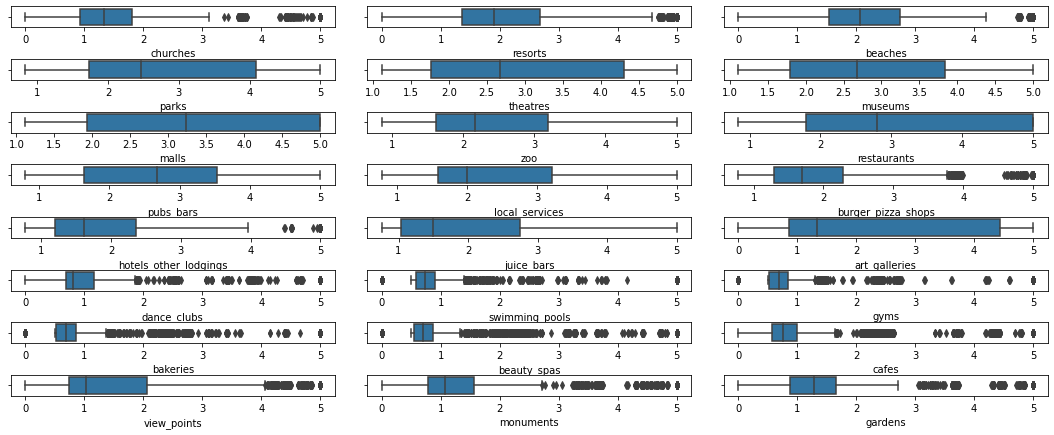

In [25]:
# Check outliers
fig, ax = plt.subplots(nrows = 8, ncols = 3, figsize=(15, 6))

plt.tight_layout()

for variable, subplot in zip(df.columns, ax.flatten()):
    sns.boxplot(df[variable], ax = subplot)
plt.show()

#### Terdapat cukup banyak outliers, kita dapat menghapusnya.. akan tetapi penghapusan dilakukan pada variabel baru

In [26]:
Q1 = df[['churches','resorts','beaches','burger_pizza_shops','hotels_other_lodgings','dance_clubs','swimming_pools','gyms','bakeries','beauty_spas','cafes','view_points','monuments','gardens']].quantile(0.25)

Q3 = df[['churches','resorts','beaches','burger_pizza_shops','hotels_other_lodgings','dance_clubs','swimming_pools','gyms','bakeries','beauty_spas','cafes','view_points','monuments','gardens']].quantile(0.75)

IQR = Q3-Q1

IQR

churches                 0.8900
resorts                  1.3225
beaches                  1.2000
burger_pizza_shops       0.9925
hotels_other_lodgings    1.1700
dance_clubs              0.4700
swimming_pools           0.3300
gyms                     0.3100
bakeries                 0.3400
beauty_spas              0.3200
cafes                    0.4300
view_points              1.3300
monuments                0.7700
gardens                  0.7800
dtype: float64

In [27]:
df_iqr = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_iqr.shape

(686, 24)

#### Karena data kita terlalu banyak yang hilang akibat dari penghapusan outliers maka kita dapat mempertimbang outliers tersebut

In [28]:
df_popularity_table = pd.DataFrame(df.mean(),columns=['Average Rating'])
df_popularity_table['TotalRatingCount'] = df.astype(bool).sum(axis=0).values
df_popularity_table

,Average Rating,TotalRatingCount
churches,1.455720,5261
resorts,2.319707,5366
beaches,2.489331,5452
parks,2.796886,5456
theatres,2.958941,5456
museums,2.893490,5456
malls,3.351395,5456
zoo,2.540795,5456
restaurants,3.126019,5456
pubs_bars,2.832729,5456


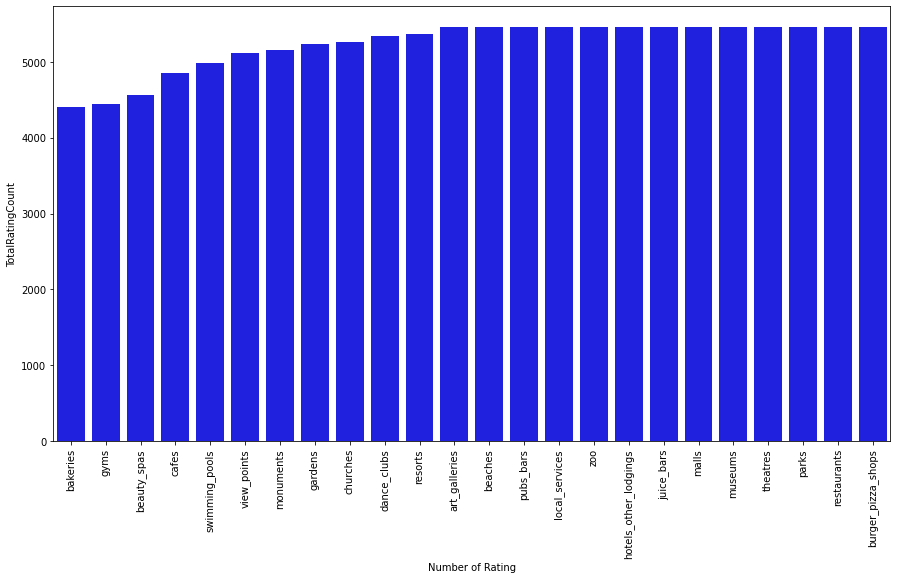

In [29]:
# cek jumlah rating
bar = df_popularity_table.sort_values(by=['TotalRatingCount'],ascending=True)
plt.figure(figsize=(15,8))
sns.barplot(bar.index,bar.TotalRatingCount,color= 'blue',orient='v')
plt.xlabel('Number of Rating')
plt.xticks(rotation=90)
plt.show()

#### Bakries lalu gyms memiliki jumlah rating yang paling sedikit

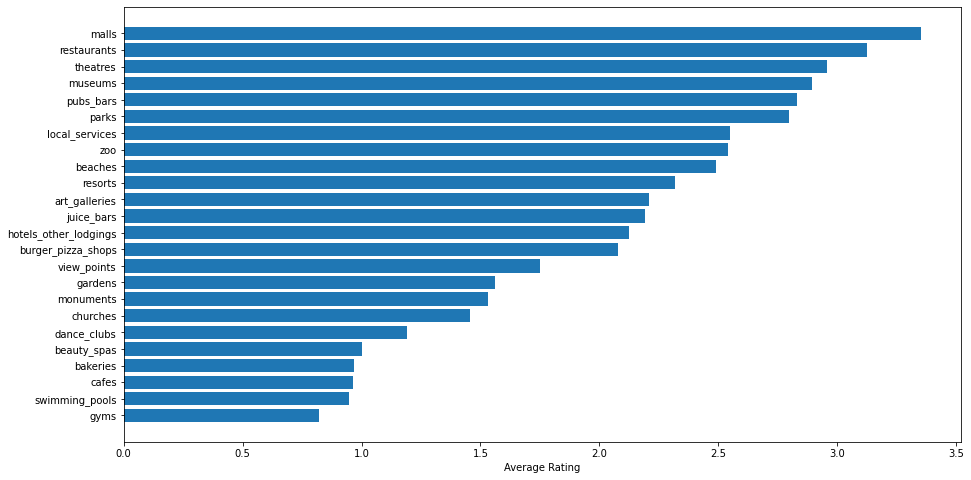

In [30]:
# melihat rata-rata rating
bar = df_popularity_table.sort_values(by=['Average Rating'],ascending=True)
plt.figure(figsize=(15,8))
plt.barh(bar.index, bar['Average Rating'])
plt.xlabel('Average Rating')
plt.show()

#### Dari plotting diatas kita dapat menyimpulkan bahwa orang saat berliburan memilih mall ketimbang gyms

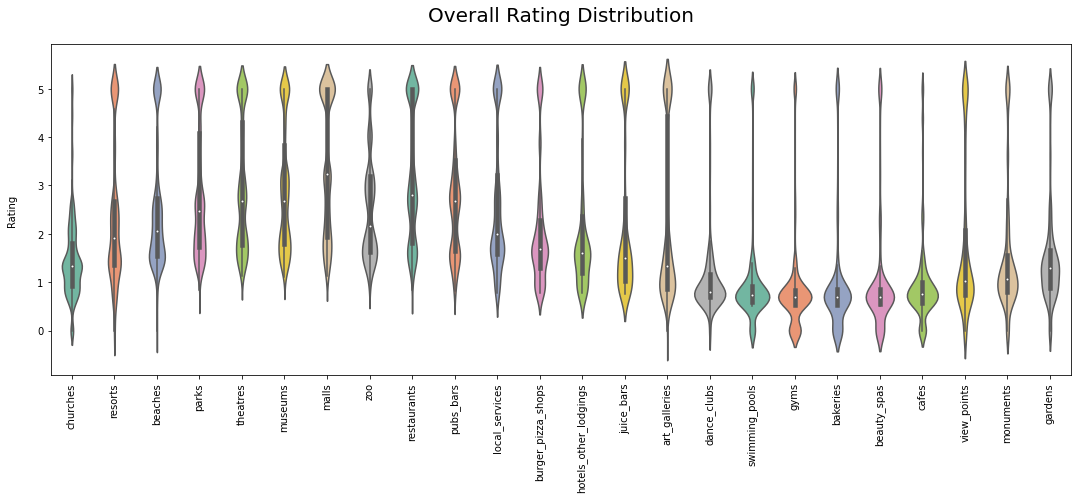

In [31]:
# Overall Rating distribution
df_transform = pd.melt(df, value_vars=['churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums', 'malls', 'zoo', 'restaurants', 'pubs_bars', 'local_services', 'burger_pizza_shops', 'hotels_other_lodgings', 'juice_bars', 'art_galleries', 'dance_clubs', 'swimming_pools', 'gyms', 'bakeries', 'beauty_spas', 'cafes', 'view_points', 'monuments', 'gardens'])
fig = plt.figure(figsize=(15,7))
g = sns.violinplot(x='variable', y='value', data=df_transform, palette='Set2')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title(f'Overall Rating Distribution',y=1.05,fontsize=20)
g.set_xlabel("") # variable
g.set_ylabel("Rating",labelpad = 20) # value
fig.tight_layout(pad = 0.8)

- Kebanyakan rating berada di rentang 0.5 - 5
- Sebagian besar wisatawan biasanya akan mengunjungi sebuah malls, restaurants dan pubs_bars
- Sangat jarang wisatawan akan mengunjungi gyms, swimming_pools, bakeries, beauty_spas dan cafes

# Recommendation System

## Popularity Based recommendation

In [32]:
df.mean()

churches                 1.455720
resorts                  2.319707
beaches                  2.489331
parks                    2.796886
theatres                 2.958941
museums                  2.893490
malls                    3.351395
zoo                      2.540795
restaurants              3.126019
pubs_bars                2.832729
local_services           2.549971
burger_pizza_shops       2.078339
hotels_other_lodgings    2.125511
juice_bars               2.190861
art_galleries            2.206573
dance_clubs              1.192801
swimming_pools           0.949203
gyms                     0.822414
bakeries                 0.969811
beauty_spas              1.000071
cafes                    0.965838
view_points              1.750537
monuments                1.531453
gardens                  1.560755
dtype: float64

In [33]:
df_popularity_table = pd.DataFrame(df.mean(), columns=['Average Rating']).sort_values(by=['Average Rating'], ascending=False)
df_popularity_table.head(24)

,Average Rating
malls,3.351395
restaurants,3.126019
theatres,2.958941
museums,2.893490
pubs_bars,2.832729
parks,2.796886
local_services,2.549971
zoo,2.540795
beaches,2.489331
resorts,2.319707


In [34]:
df_popularity_table['Total Rating Count'] = df.astype(bool).sum().values
df_popularity_table.head(10)

,Average Rating,Total Rating Count
malls,3.351395,5261
restaurants,3.126019,5366
theatres,2.958941,5452
museums,2.893490,5456
pubs_bars,2.832729,5456
parks,2.796886,5456
local_services,2.549971,5456
zoo,2.540795,5456
beaches,2.489331,5456
resorts,2.319707,5456


### Top 10 Recommendation destinations to new visitor Europe.

## Collaborative Filtering

In [131]:
from surprise import Dataset,Reader, SVDpp
from surprise.model_selection import cross_validate

In [132]:
df_coll = df1.set_index('User', append=True).stack().reset_index().rename(columns={0:'rating', 'level_2':'Category'}).drop('level_0',1)
df_coll .head(10)

,User,Category,rating
0,User 1,churches,0.00
1,User 1,resorts,0.00
2,User 1,beaches,3.63
3,User 1,parks,3.65
4,User 1,theatres,5.00
5,User 1,museums,2.92
6,User 1,malls,5.00
7,User 1,zoo,2.35
8,User 1,restaurants,2.33
9,User 1,pubs_bars,2.64


In [133]:
data = Dataset.load_from_df(df_coll, Reader())
trainset = data.build_full_trainset() # generate data train

In [134]:
model = SVDpp()
model.fit(trainset)

In [135]:
print('Number of user:',trainset.n_users)
print('Number of items:',trainset.n_items)

Number of user: 5456
Number of items: 24


In [174]:
model.predict(1, "zoo") 

Prediction(uid=1, iid='zoo', r_ui=None, est=2.1513178240937423, details={'was_impossible': False})

In [185]:
user_id = 'User 20'

In [186]:
test_set = [[user_id,iid,4] for iid in item_id]
test_set

[['User 20', 'churches', 4],
 ['User 20', 'resorts', 4],
 ['User 20', 'beaches', 4],
 ['User 20', 'parks', 4],
 ['User 20', 'theatres', 4],
 ['User 20', 'museums', 4],
 ['User 20', 'malls', 4],
 ['User 20', 'zoo', 4],
 ['User 20', 'restaurants', 4],
 ['User 20', 'pubs_bars', 4],
 ['User 20', 'local_services', 4],
 ['User 20', 'burger_pizza_shops', 4],
 ['User 20', 'hotels_other_lodgings', 4],
 ['User 20', 'juice_bars', 4],
 ['User 20', 'art_galleries', 4],
 ['User 20', 'dance_clubs', 4],
 ['User 20', 'swimming_pools', 4],
 ['User 20', 'gyms', 4],
 ['User 20', 'bakeries', 4],
 ['User 20', 'beauty_spas', 4],
 ['User 20', 'cafes', 4],
 ['User 20', 'view_points', 4],
 ['User 20', 'monuments', 4],
 ['User 20', 'gardens', 4]]

- uii = id of user 
- uid = id of item
- r_ui = rating

### Memprediksi rating untuk film yang belum dirating

In [187]:
pred = model.test(test_set)

In [188]:
rec = pd.DataFrame(pred).sort_values(by='est',ascending=False)
rec.head(5)

,uid,iid,r_ui,est,details
21,User 20,view_points,4,3.832162,{'was_impossible': False}
1,User 20,resorts,4,3.321936,{'was_impossible': False}
2,User 20,beaches,4,2.917330,{'was_impossible': False}
22,User 20,monuments,4,2.785232,{'was_impossible': False}
3,User 20,parks,4,2.386653,{'was_impossible': False}


#### 5 Destination yang bisa di rekomendasikan ke user 10

# Evaluasi Model

In [190]:
from surprise.model_selection import train_test_split
[trainset,testset] = train_test_split(data,test_size=0.3)
model = SVDpp()
model.fit(trainset)

In [195]:
test_pred= model.test(test_set)

In [196]:
tp = pd.DataFrame(test_pred)
tp.head()

,uid,iid,r_ui,est,details
0,User 20,churches,4,1.000000,{'was_impossible': False}
1,User 20,resorts,4,4.149481,{'was_impossible': False}
2,User 20,beaches,4,3.291426,{'was_impossible': False}
3,User 20,parks,4,3.309093,{'was_impossible': False}
4,User 20,theatres,4,3.643323,{'was_impossible': False}
